## K-means

#### import library

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import os
from sklearn.metrics import accuracy_score
from PIL import Image
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

#### map location name to index

In [2]:
print(os.listdir('./data/train'))
labels_name = ['Taichung_City', 'Chiayi_County', 'New_Taipei_City', 'Hualien_County', 'Taitung_County', 'Tainan_City', 'Changhua_County', 'Yilan_County', 'Keelung_City', 'Taipei_City', 'Miaoli_County', 'Chiayi_City', 'Hsinchu_City', 'Hsinchu_County', 'Taoyuan_City', 'Kaohsiung_City', 'Pingtung_County', 'Nantou_County', 'Yunlin_County']
labels_index = {Label: i for i, Label in enumerate(labels_name)}

['Taichung_City', 'Chiayi_County', 'New_Taipei_City', 'Hualien_County', 'Taitung_County', 'Tainan_City', 'Changhua_County', 'Yilan_County', 'Keelung_City', 'Taipei_City', 'Miaoli_County', 'Chiayi_City', 'Hsinchu_City', 'Hsinchu_County', 'Taoyuan_City', 'Kaohsiung_City', 'Pingtung_County', 'Nantou_County', 'Yunlin_County']


#### load image function

In [3]:
def load_images_from_folder(folder, image_size = (640, 640)):
    images = []
    labels = []
    cities = os.listdir(folder)
    for city in cities:
        for filename in os.listdir(os.path.join(folder, city)):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                img = Image.open(os.path.join(folder, city, filename))
                img = img.resize(image_size)  # Resize images
                img_array = np.array(img).flatten()  # Flatten the image
                images.append(img_array)
                labels.append(city)
    return np.array(images), np.array(labels)

#### Define K-means Classifier

In [4]:
class KMeansClassifier:
    '''
    K: number of clusters
    use_PCA: whether to use PCA to reduce the dimension of the data
    PCAcomponents: the n_components of PCA
    
    StandardScaler is used to normalize the data
    '''
    def __init__(self, K, use_PCA=False, PCA_components=100):
        self.K = K
        self.use_PCA = use_PCA
        self.PCA_components = PCA_components
        self.kmeans = KMeans(n_clusters=K, random_state=42)
        if use_PCA == True:
            self.PCA = PCA(n_components=PCA_components, svd_solver='full')
        self.cluster_to_label = None
    
    def fit(self, Img, labels):
        self.scaler = StandardScaler()
        self.scaler.fit(Img)
        X = self.scaler.transform(Img)
        if self.use_PCA:
            self.PCA.fit(X)
            X = self.PCA.transform(X)
            print('Explained variance ratio:', sum(self.PCA.explained_variance_ratio_))
        
        self.kmeans.fit(X)
        clusters = self.kmeans.predict(X)
        self.cluster_to_label = {}
        for i in range(self.K):
            labels_count = {}
            for j in range(len(clusters)):
                if clusters[j] == i:
                    labels_count[labels[j]] = labels_count.get(labels[j], 0) + 1

            labels_count = sorted(labels_count.items(), key=lambda x: x[1], reverse=True)
            self.cluster_to_label[i] = labels_count[0][0]
    
    def predict(self, Img):
        X = self.scaler.transform(Img)
        if self.use_PCA:
            X = self.PCA.transform(X)
        clusters = self.kmeans.predict(X)
        predicted_labels = [self.cluster_to_label[cluster] for cluster in clusters]
        return predicted_labels

### Simple K = 19

accuracy: 0.0987
precision: 0.0642
recall: 0.1040
f1_score: 0.0750


/home/scottchou/NYCU/AI_Capstone/project1/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


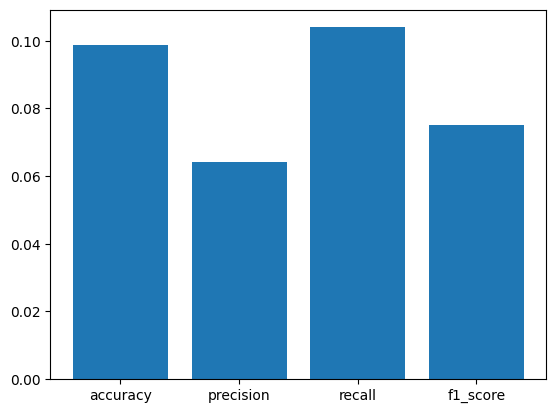

<Axes: >

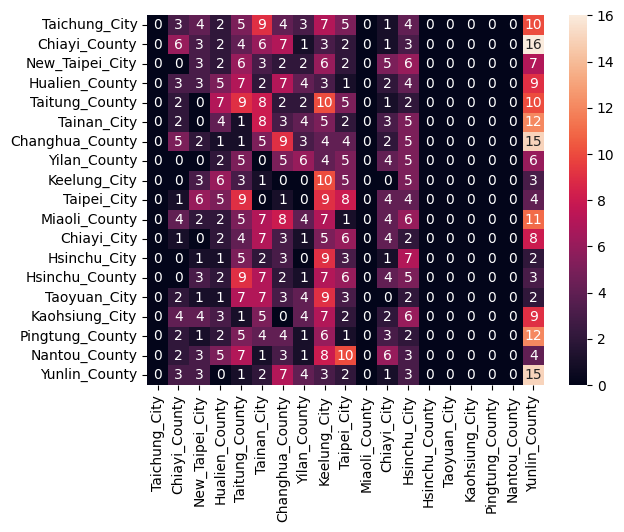

In [ ]:
Img, labels = load_images_from_folder('data/train', (64, 64))
labels = np.array([labels_index[label] for label in labels])
train_Img, test_Img, train_labels, test_labels = train_test_split(Img, labels, test_size=0.2, random_state=42)

kmeans = KMeansClassifier(K = 19)
kmeans.fit(train_Img, train_labels)
predicted_labels = kmeans.predict(test_Img)
accuracy = accuracy_score(test_labels, predicted_labels)
precision = metrics.precision_score(test_labels, predicted_labels, average='macro')
recall = metrics.recall_score(test_labels, predicted_labels, average='macro')
f1_score = metrics.f1_score(test_labels, predicted_labels, average='macro')

print(f'accuracy: {accuracy:.4f}')
print(f'precision: {precision:.4f}')
print(f'recall: {recall:.4f}')
print(f'f1_score: {f1_score:.4f}')
plt.bar(['accuracy', 'precision', 'recall', 'f1_score'],[accuracy, precision, recall, f1_score])
plt.show()
cm = confusion_matrix(test_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels_name, yticklabels=labels_name)

### Test Different K

/home/scottchou/NYCU/AI_Capstone/project1/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


K=19, Accuracy=0.09868421052631579, Precision=0.0642136229483147, Recall=0.10398722633262886, F1 Score=0.07503704560262438


/home/scottchou/NYCU/AI_Capstone/project1/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


K=25, Accuracy=0.08991228070175439, Precision=0.0666458803989748, Recall=0.09248716601596502, F1 Score=0.06868287256947068


/home/scottchou/NYCU/AI_Capstone/project1/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


K=30, Accuracy=0.08662280701754387, Precision=0.06616580528799221, Recall=0.08785964257483245, F1 Score=0.06837854029950237


/home/scottchou/NYCU/AI_Capstone/project1/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


K=35, Accuracy=0.08552631578947369, Precision=0.070245023554797, Recall=0.09157747624158151, F1 Score=0.07231096646373238


/home/scottchou/NYCU/AI_Capstone/project1/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


K=40, Accuracy=0.08333333333333333, Precision=0.07906661627581382, Recall=0.08474081339635083, F1 Score=0.07075963069041137


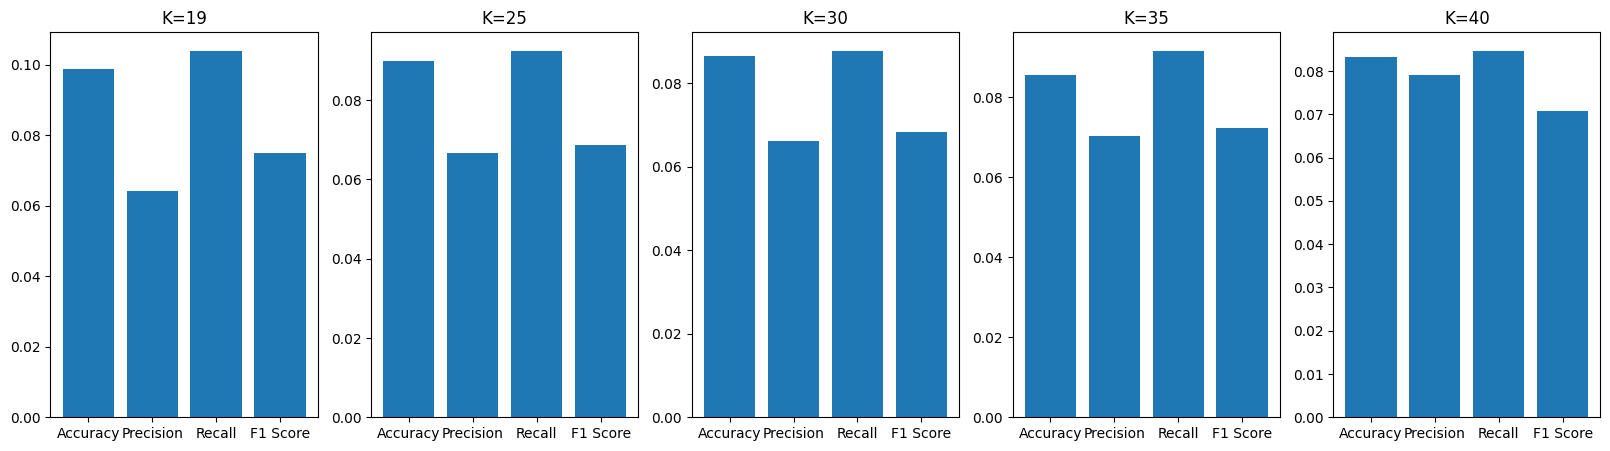

In [ ]:
Img, labels = load_images_from_folder('data/train', (64, 64))
labels = np.array([labels_index[label] for label in labels])
train_Img, test_Img, train_labels, test_labels = train_test_split(Img, labels, test_size=0.2, random_state=42)


K_values = [19, 25, 30, 35, 40]
flg, ax = plt.subplots(1, 5, figsize=(20, 5))
for K in K_values:
    kMeansClassifier = KMeansClassifier(K = K)
    kMeansClassifier.fit(train_Img, train_labels)
    predicted_labels = kMeansClassifier.predict(test_Img)
    accuracy = accuracy_score(test_labels, predicted_labels)
    precision = metrics.precision_score(test_labels, predicted_labels, average='macro')
    recall = metrics.recall_score(test_labels, predicted_labels, average='macro')
    f1_score = metrics.f1_score(test_labels, predicted_labels, average='macro')
    
    ax[K_values.index(K)].bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], [accuracy, precision, recall, f1_score])
    ax[K_values.index(K)].set_title(f'K={K}')
    print(f'K={K}, Accuracy={accuracy}, Precision={precision}, Recall={recall}, F1 Score={f1_score}')
plt.show()

#### Test Different PCA Dimension

In [ ]:
Img, labels = load_images_from_folder('data/train', (64, 64))
labels = np.array([labels_index[label] for label in labels])
train_Img, test_Img, train_labels, test_labels = train_test_split(Img, labels, test_size=0.2, random_state=42)


com_values = [200, 300, 400, 500]
flg, ax = plt.subplots(1, 4, figsize=(20, 5))
for com in com_values:
    kMeansClassifier = KMeansClassifier(K=19, use_PCA=True, PCA_components=com)
    kMeansClassifier.fit(train_Img, train_labels)
    predicted_labels = kMeansClassifier.predict(test_Img)
    accuracy = accuracy_score(test_labels, predicted_labels)
    precision = metrics.precision_score(test_labels, predicted_labels, average='macro')
    recall = metrics.recall_score(test_labels, predicted_labels, average='macro')
    f1_score = metrics.f1_score(test_labels, predicted_labels, average='macro')
    
    ax[com_values.index(com)].bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], [accuracy, precision, recall, f1_score])
    ax[com_values.index(com)].set_title(f'components={com}')
    print(f'components={com}, Accuracy={accuracy}, Precision={precision}, Recall={recall}, F1 Score={f1_score}')
plt.show()